<p><img alt="Colaboratory logo" height="50px" src="https://github.com/INGEOTEC/text_models/raw/master/docs/source/ingeotec.png" align="left" hspace="10px" vspace="0px" /></p>

# CompStats
## Quickstart Guide

### <http://compstats.readthedocs.org>



## Installing CompStats

In [1]:
# !python -m pip uninstall CompStats

In [2]:
# %pip install -U git+https://github.com/INGEOTEC/CompStats@origin/develop
# %pip install -U "C:\Users\Sergio Nava\Documentos\GitHub\INGEOTEC\CompStats"
# %pip install -U git+https://github.com/INGEOTEC/CompStats@develop
# %pip install -U CompStats

First, we need to install CompStats. This can be quickly done through pip, the Python package manager.

In [3]:
try:
  import CompStats
except ImportError:
    %pip install "C:\Users\Sergio Nava\Documentos\GitHub\INGEOTEC\CompStats"

## Libraries

After installing `CompStats`, we must import the necessary libraries for our analysis. `CompStats` relies on several Python libraries for data analysis and scientific computing.

The first line of the following code loads two functions from the `CompStats` library. The `performance_multiple_metrics` function is used to calculate and analyze the performance of machine learning models for the multimetric case. On the other hand, the `plot_performance_multiple` function visualizes the performance metrics calculated by `performance_multiple_metrics`, such as accuracy or F1 score, along with confidence intervals to help understand the variability and reliability of the performance metrics.

The second line imports two functions: `difference_multiple` and `plot_difference_multiple`; `difference_multiple` assesses the differences in performance between models in comparison to the best system for each metric, and `plot_difference_multiple` visually represents these differences relative to the best system.

The third line imports two functions: `all_differences` and `difference_p_value`. `all_differences` evaluates the differences in performance between all models, and `difference_p_value` estimates the p-value of the hypothesis that the difference is significantly greater than zero.

The fourth line imports the function `multipletests`that is used for adjusting p-values when multiple hypothesis tests are performed, to control for the false discovery rate or family-wise error rate.

The rest of the lines load commonly used Python libraries.

In [4]:
from CompStats import performance_multiple_metrics, plot_performance_multiple
from CompStats import difference_multiple, plot_difference_multiple
from CompStats import all_differences_multiple
from CompStats import difference_p_value
from statsmodels.stats.multitest import multipletests
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, precision_score
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# la siguiente línea es para cargar el modulo measurements para calcular el CI 
from CompStats import measurements

# Dataset

Once we have set up our environment, we can explore what CompStats offers. Let's begin with a basic example of how to use CompStats for a simple statistical analysis.

To illustrate the use of CompStats, we will use a dataset included in the CompStats package. The path of the dataset is found with the following instructions. The variable `DATA` contains the path as shown below.  

In [5]:
# from CompStats.tests.test_performance import DATA
import os
# DATA = "C:\\Users\\Sergio Nava\\Documentos\\GitHub\\INGEOTEC\\CompStats\\CompStats\\tests\\data.csv"
#DATA = '/Users/nava/Documents/GitHub/DCCD/CompStats/CompStats/tests/data.csv'


In [26]:
from sklearn.metrics import f1_score

def calcular_f1_score(y_true, y_pred, *args, **kwargs):
    """
    Calcula el promedio del F1 Score para las clases 'FAVOR' y 'AGAINST'.
    
    Args:
    y_true: Lista o array de etiquetas verdaderas.
    y_pred: Lista o array de etiquetas predichas.
    *args: Argumentos adicionales que se pasarán a f1_score.
    **kwargs: Argumentos nombrados que se pasarán a f1_score.
    
    Returns:
    float: Promedio del F1 Score para las clases 'FAVOR' y 'AGAINST'.
    """
 
    # Calcular el promedio de los F1 Scores
    promedio_f1 =  np.mean(f1_score(y_true, y_pred, average=None)[:2])
    
    return promedio_f1

# Ejemplo de uso
y_true = ['FAVOR', 'AGAINST', 'NONE', 'FAVOR', 'AGAINST', 'AGAINST']
y_pred = ['FAVOR', 'AGAINST', 'FAVOR', 'AGAINST', 'NONE', 'FAVOR']

promedio_f1 = calcular_f1_score(y_true, y_pred)
print(f"Promedio del F1 Score: {promedio_f1}")


Promedio del F1 Score: 0.4


`DATA` contains the information to compare six systems for a multiclass classification task. The next instruction loads the data into a dataframe.

In [27]:
DATA = 'VaxxStance_Textual_eu_paper'
metrics = [
    {"func": calcular_f1_score,"args": {"average": "None"},  'BiB': True}
    ]
#DATA = 'detoxis_subtask1'
#metrics = [
#    {"func": f1_score, "args": {"average": "binary"}, 'BiB': True}
#    ]
#DATA = 'exist_task1_en_l'
#metrics = [
#    {"func": accuracy_score,  'BiB': True}
#    ]
#DATA = 'MeOffendEs_subtask3'
#metrics = [
#    {"func": f1_score, "args": {"average": "binary"}, 'BiB': True}
#    ]
#DATA = 'RES-MEX2021_recomendation'
#metrics = [
#    {"func": mean_absolute_error,  'BiB': False}
#    ]
#DATA = 'PARMEX_2022'
#metrics = [
#    {"func": f1_score, "args": {"average": "binary"}, 'BiB': True}
#    ]
df = pd.read_csv(DATA+'.csv')
print(df.head())

perf = performance_multiple_metrics(df, "y", metrics,num_samples=1000)

         y MultiAztertest.01 MultiAztertest.02 SQYQP.01 WordUp.01 WordUp.02
0  AGAINST           AGAINST           AGAINST  AGAINST     FAVOR     FAVOR
1  AGAINST             FAVOR           AGAINST  AGAINST     FAVOR     FAVOR
2  AGAINST             FAVOR              NONE    FAVOR   AGAINST   AGAINST
3    FAVOR             FAVOR             FAVOR  AGAINST     FAVOR     FAVOR
4    FAVOR             FAVOR              NONE  AGAINST     FAVOR     FAVOR


In [28]:
import pickle

# Suponiendo que tienes un objeto "perf"
#perf = {"nombre": "Ejemplo", "valor": 10}

#print(perf)
# Almacenar el objeto en un archivo
with open(DATA+".dat", "wb") as archivo:
    pickle.dump(perf, archivo)

# Recuperar el objeto del archivo
with open(DATA+".dat", "rb") as archivo:
    perf_recuperado = pickle.load(archivo)

#print(perf_recuperado)

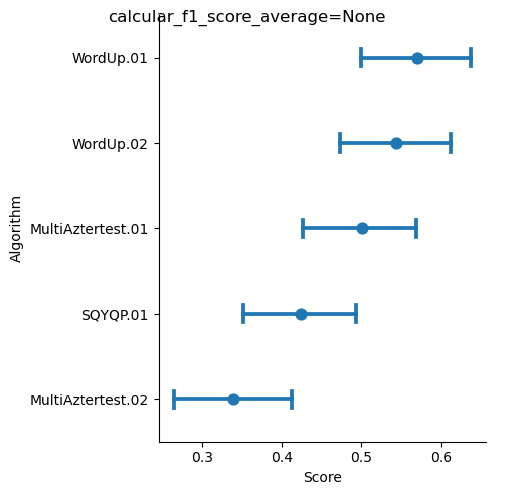

In [29]:
face_grid = plot_performance_multiple(perf_recuperado)

In [ ]:
diff = difference_multiple(perf) 

In [ ]:
for metric, diffs in diff['winner'].items():
    print(f"For {metric} the best performing system is {diffs['best']}")

In [ ]:
for metric, diffs in diff['winner'].items():
    print(f"\nFor the metric {metric} the best is {diffs['best']}")
    for key, value in diffs['CI'].items():
        print(f"CI for {key} {value}")


In [ ]:
face_grid_diff = plot_difference_multiple(diff)

In [ ]:
for metric, diffs in diff['winner'].items():
    print(f"\nFor the metric {metric} the best is {diffs['best']}")
    for key, value in diffs['p_value'].items():
        print(f"p-value for the difference with {key} {value}")

In [ ]:
correction = 'bonferroni'
for metric, diffs in diff['winner'].items():
    print(f"\nFor the metric {metric} the best is {diffs['best']}")
    result = multipletests(list(diffs['p_value'].values()), method=correction)
    p_valuesC = dict(zip(diffs['p_value'].keys(),result[1])) 
    for key, value in p_valuesC.items():
        print(f'{key}, p-value corrected by {correction} = {value}')

In [ ]:
all_diff = all_differences_multiple(perf)


In [ ]:
all_diff['compg']

In [ ]:
for metric, diffs in all_diff['all'].items():
    print(f"\nFor the metric {metric} ")
    for key, value in diffs['p_value'].items():
        print(f"p-value for the difference {key} {value}")

In [ ]:
correction = 'bonferroni'
for metric, diffs in all_diff['all'].items():
    print(f"\nFor the metric {metric}")
    result = multipletests(list(diffs['p_value'].values()), method=correction)
    p_valuesC = dict(zip(diffs['p_value'].keys(),result[1])) 
    for key, value in p_valuesC.items():
        print(f'{key}, p-value corrected by {correction} = {value}')